In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/LOLOracleDataWr.csv')

In [3]:
df.head()

,BTop,BJng,BMid,BAdc,BSup,RTop,RJng,RMid,RAdc,RSup,Winner
0,0.524364,0.506967,0.497972,0.523989,0.438144,0.533592,0.494477,0.491465,0.503883,0.492260,1
1,0.524364,0.504318,0.565594,0.523989,0.491429,0.516260,0.509972,0.559211,0.504505,0.440678,0
2,0.513399,0.486450,0.553073,0.525246,0.524819,0.489831,0.539535,0.465315,0.470158,0.527418,0
3,0.511305,0.505097,0.502868,0.524169,0.534702,0.508671,0.502106,0.508434,0.393443,0.492582,1
4,0.524364,0.509764,0.421169,0.525246,0.516461,0.499863,0.502106,0.445918,0.465315,0.473513,1


### Lets implement KNN model now

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop('Winner',axis=1)
y = df['Winner']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [14]:
predictions = knn.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix,classification_report

In [16]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[1564 1391]
 [1518 1431]]


              precision    recall  f1-score   support

           0       0.51      0.53      0.52      2955
           1       0.51      0.49      0.50      2949

    accuracy                           0.51      5904
   macro avg       0.51      0.51      0.51      5904
weighted avg       0.51      0.51      0.51      5904



In [17]:
#Lets choose a K value now

In [20]:
error_rate = []

for i in range(1,200):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

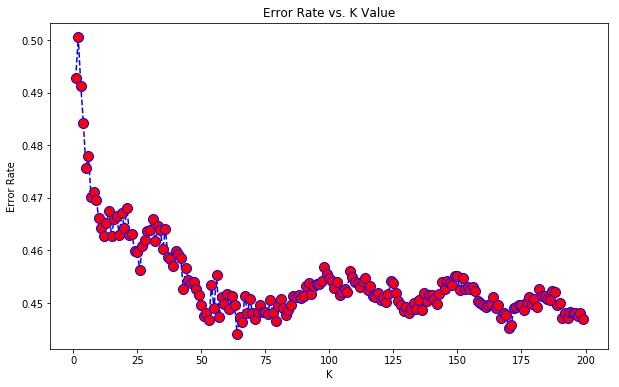

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,200),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [30]:
knn = KNeighborsClassifier(n_neighbors=63)

In [31]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=63, p=2,
                     weights='uniform')

In [32]:
predictions = knn.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[1730 1225]
 [1430 1519]]


              precision    recall  f1-score   support

           0       0.55      0.59      0.57      2955
           1       0.55      0.52      0.53      2949

    accuracy                           0.55      5904
   macro avg       0.55      0.55      0.55      5904
weighted avg       0.55      0.55      0.55      5904

